Checking whether randomly dropping points are good representation of a circle.

In [3]:
!pip3 install numpy matplotlib

  Using cached numpy-2.1.1-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached numpy-2.1.1-cp312-cp312-macosx_14_0_arm64.whl (5.1 MB)
Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp312-cp312-macosx_11_0_arm64.whl (251 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.1-cp312-cp312-macosx_11_0_arm64.whl (2.2 MB)
Using cached kiwisolver-1.4.7-cp312-cp

In [4]:
import numpy
import matplotlib.pyplot as plt
plt.style.use("bmh")
%config InlineBackend.figure_formats=["png"]

In [5]:
N = 10_000
inside = []
outside = []
for i in range(N):
    x = numpy.random.uniform(-1, 1)
    y = numpy.random.uniform(-1, 1)
    if numpy.sqrt(x**2 + y**2) < 1:
        inside.append((x, y))
    else:
        outside.append((x, y))

We can plot the points that we have marked as being inside the circle, to check that we indeed have an approximation to a circle.

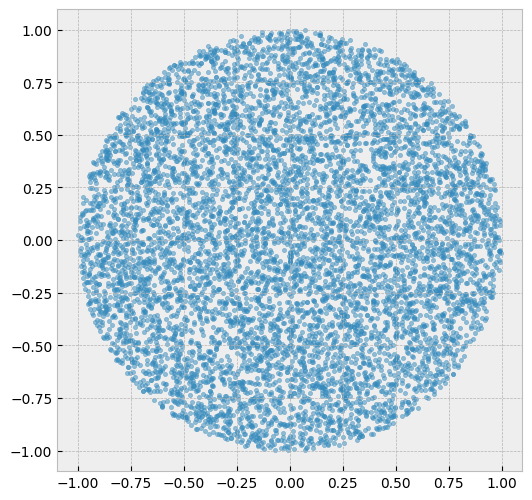

In [6]:
plt.figure(figsize=(6, 6))
plt.scatter([x[0] for x in inside], [x[1] for x in inside], marker=".", alpha=0.5);

#plt.scatter([x[0] for x in outside], [x[1] for x in outside], marker=".", alpha=0.5);

Finally, we can check our estimate of 
π
π as the count divided by N and multiplied by 4:

In [7]:
4 * len(inside)/float(N)

3.15

*Speed of convergence*
Theory tells us that the convergence of a Monte Carlo procedure is related to the square root of the number of iterations. This means that the estimation error should decrease proportionally to the inverse of the square root of 
N
N, the number of iterations.

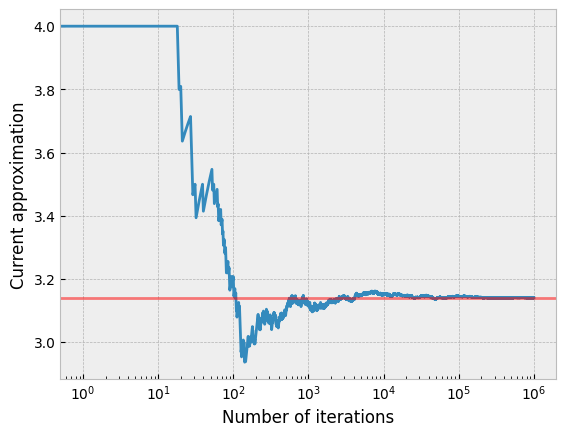

In [8]:
N = 1_000_000
inside = 0
approximation = numpy.empty(N)
for i in range(N):
    x = numpy.random.uniform(-1, 1)
    y = numpy.random.uniform(-1, 1)
    if numpy.sqrt(x**2 + y**2) < 1:
        inside += 1
    approximation[i] = 4 * inside/float(i+1)
plt.semilogx(approximation)
plt.xlabel("Number of iterations")
plt.ylabel("Current approximation")
# plot the exact value of pi in red
plt.axhline(numpy.pi, color="r", alpha=0.5);

In [9]:
print(approximation)

[4.         4.         4.         ... 3.14062628 3.14062714 3.140628  ]
